<a href="https://colab.research.google.com/github/shreyas269/programming/blob/master/machine_learning/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

In [2]:
n_pts = 100
centers = [[-0.5, 0.5], [0.5, -0.5]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4)

x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(100, 1))
print(y.shape)

(100,)


In [0]:
def scatter_plot():
  plt.scatter(X[y==0, 0], X[y==0, 1])
  plt.scatter(X[y==1, 0], X[y==1, 1])

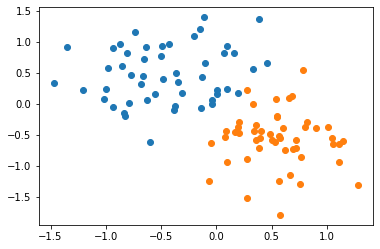

In [4]:
scatter_plot()

In [0]:
class Model(nn.Module):
    def __init__(self, input_size, output_size):
      super().__init__() 
      self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
      pred = torch.sigmoid(self.linear(x))
      return pred
    def predict(self, x):
      pred = self.forward(x)
      if pred >= 0.5:
        return 1
      else:
        return 0

In [6]:
torch.manual_seed(52)
model = Model(2, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[0.3058, 0.4013]], requires_grad=True), Parameter containing:
tensor([0.2633], requires_grad=True)]


In [0]:
[w, b] = model.parameters()
w1, w2 = w.view(2)
def get_params():
  return (w1.item(), w2.item(), b[0].item())

In [0]:
def plot_fit(title):
  plt.title = title
  w1, w2, b1 = get_params()
  x1 = np.array([-2, 2])
  x2 = (w1*x1 + b1)/(-w2)
  plt.plot(x1, x2, 'r')
  scatter_plot()
  plt.show()

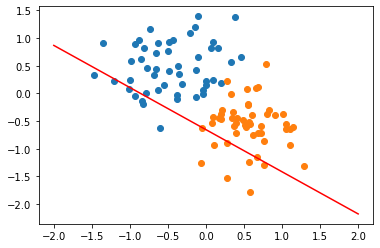

In [9]:
plot_fit('Initial Model')

In [0]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [11]:
epochs = 10000
losses = []

for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)
  if i%500 == 0: 
    print("epoch:", i, "loss:", loss.item())
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 loss: 0.7357074618339539
epoch: 500 loss: 0.3725249171257019
epoch: 1000 loss: 0.2659878432750702
epoch: 1500 loss: 0.2160821110010147
epoch: 2000 loss: 0.18652959167957306
epoch: 2500 loss: 0.16663973033428192
epoch: 3000 loss: 0.1521473377943039
epoch: 3500 loss: 0.14100508391857147
epoch: 4000 loss: 0.13210104405879974
epoch: 4500 loss: 0.12477599084377289
epoch: 5000 loss: 0.1186121478676796
epoch: 5500 loss: 0.11333107203245163
epoch: 6000 loss: 0.10873913764953613
epoch: 6500 loss: 0.10469722002744675
epoch: 7000 loss: 0.1011025533080101
epoch: 7500 loss: 0.0978773757815361
epoch: 8000 loss: 0.09496159851551056
epoch: 8500 loss: 0.09230803698301315
epoch: 9000 loss: 0.08987899124622345
epoch: 9500 loss: 0.08764395862817764


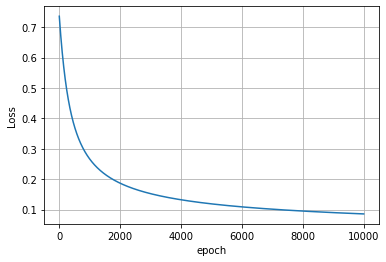

In [12]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.grid()

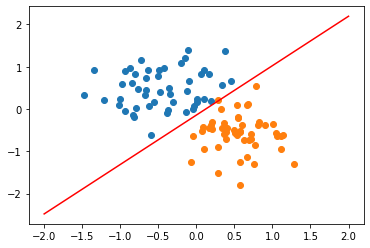

In [13]:
plot_fit("Trained Model")

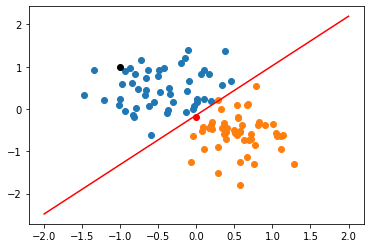

Red point positive probability = 0.5489301085472107
Black point positive probability = 0.00026589722256176174
Red point belongs in class 1
Black point belongs in class = 0


In [14]:
point1 = torch.Tensor([0, -0.2])
point2 = torch.Tensor([-1.0, 1.0])
plt.plot(point1.numpy()[0], point1.numpy()[1], 'ro')
plt.plot(point2.numpy()[0], point2.numpy()[1], 'ko')
plot_fit("Trained Model")
print("Red point positive probability = {}".format(model.forward(point1).item())) 
print("Black point positive probability = {}".format(model.forward(point2).item())) 
print("Red point belongs in class {}".format(model.predict(point1))) 
print("Black point belongs in class = {}".format(model.predict(point2)))